# Milestone 1

    Given the full name of a target github repository (e.g. “kubernetes/kubernetes” which refers to https://github.com/kubernetes/kubernetes/), fetch all of that project’s contributors, and then fetch each contributor’s repositories (i.e. the repos that they have forked). Count how many times each repository appears across all contributors. Then print to stdout a summary of the top 10 repositories by count.

In [111]:
import csv
import os
import pandas as pd
import numpy as np
import sys
%matplotlib inline
import seaborn as sns
import unittest

### Read the csv 

In [89]:
if os.path.exists('data.csv'):
    df=pd.read_csv('data.csv')

In [90]:
df.head()

,parent_org,parent_repo,contributor,repo
0,adamnemecek,zipline,adamnemecek,2etime-Graphics
1,adamnemecek,zipline,adamnemecek,active_admin
2,adamnemecek,zipline,adamnemecek,adamnemecek.github.com
3,adamnemecek,zipline,adamnemecek,adamnemecek.github.io
4,adamnemecek,zipline,adamnemecek,aecombiner


#### Group by repos by their number of occurances 

In [92]:
repo_results = df.groupby(['repo']).size().reset_index(name='repo_count')
repo_results.head()

,repo,repo_count
0,.dotfiles,3
1,.emacs.d,4
2,.unixrc,1
3,.vim,5
4,01-14-16-Presentation-Slides-SpriteKit-Tips,1


### Sort the result

In [93]:
# store the result as repositories_count.csv in the format of <index, repo , count>

In [86]:
sorted_repo_results=repo_results.sort_values(by='repo_count', ascending=False)
sorted_repo_results.to_csv('repositories_count.csv')

In [95]:
def get_top_n(n):
    '''
     get the top n repos according to their count. 
     @input n: integer number
     @return dataframe: containing top 10 values
    '''
    df_top_n=repo_results.sort_values(by='repo_count', ascending=False)[:n]
    
    return df_top_n
    
get_top_n(10)

,repo,repo_count
7739,kubernetes,379
7866,kubernetes.github.io,168
11885,test-infra,155
3911,contrib,118
4495,docker,99
9515,origin,81
6524,heapster,71
3198,cadvisor,70
5258,features,67
10526,release,65


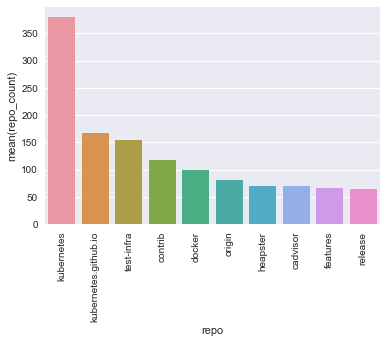

In [96]:
##  Plot top n repos with their count
top_repos=get_top_n(10)
plt=sns.barplot(x="repo", y="repo_count", data=top_repos)
plt.set_xticklabels(labels = top_repos["repo"],rotation=90)

## Additional Analysis

### Parent Organisation & Total Repos Count of their contributors

In [97]:
parent_repo_results = df.groupby(['parent_org']).size().reset_index(name='repo_count')
parent_repo_results.head()

,parent_org,repo_count
0,AudioKit,1962
1,adamnemecek,1386
2,kubernetes,16454


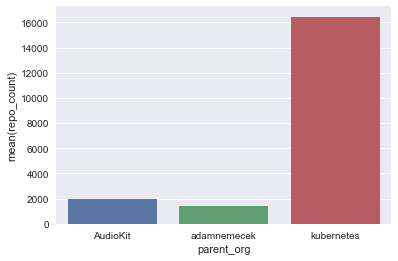

In [98]:
sns.barplot(x="parent_org", y="repo_count", data=parent_repo_results)

###  Top Contributors based on their repos count

In [99]:
contributors_results = df.groupby(['contributor']).size().reset_index(name='contributor_repo_count')
contributors_results.head()

,contributor,contributor_repo_count
0,249043822,5
1,AdrianBinDC,38
2,AnanyaKumar,15
3,AntonioMeireles,34
4,ArtfulCoder,6


In [79]:
contributors_results_data=contributors_results.sort_values(by='contributor_repo_count', ascending=False)[:25]

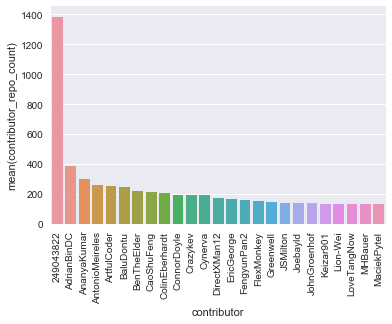

In [100]:
plt1=sns.barplot(x="contributor", y="contributor_repo_count", data=contributors_results_data)
plt1.set_xticklabels(labels = contributors_results["contributor"],rotation=90)

#### Get more information about the contributors on adhoc basis

In [107]:

def get_count_for_given_repo(repo):
    '''to get count of a given repo
    @input repo name: string
    @return value: integer
    
    '''
    return repo_results.loc[repo_results['repo'] == repo]['repo_count']



def get_list_of_repos_for_given_contributor(contributor):
    '''to get list of repos for a given contributor
    @input contributor: string
    @return list of repos
    '''
    return df.loc[df['contributor']== contributor]['repo']



contributor_repo_dict={}
def get_repowise_count_for_given_contributor(contributor):
    '''to get count of all repos for a given contributor
    @input contributor: string
    @return dictionary of repos & their count 
    '''
    repos_list = get_list_of_repos_for_given_contributor(contributor)
    for repo in repos_list:
        contributor_repo_dict[repo]=repo_results.loc[repo_results['repo'] == repo]['repo_count'].values[0]
    return contributor_repo_dict


In [108]:
print get_count_for_given_repo('zxcvbn-go').values[0]
print get_list_of_repos_for_given_contributor('lavalamp').values
print get_repowise_count_for_given_contributor('lavalamp')

1
['aichallenge' 'apiserver' 'client-go' 'client-go-flat' 'contrib' 'docker'
 'gengo' 'ginkgo' 'gofuzz' 'heapster' 'hub' 'k8s.io' 'kubernetes'
 'kubernetes.github.io' 'test-infra']
{'heapster': 71, 'aichallenge': 2, 'kubernetes': 379, 'gofuzz': 5, 'gengo': 28, 'apiserver': 26, 'ginkgo': 9, 'test-infra': 155, 'hub': 5, 'client-go': 62, 'k8s.io': 28, 'contrib': 118, 'client-go-flat': 1, 'kubernetes.github.io': 168, 'docker': 99}


## Tests

In [164]:
class UnitTests(unittest.TestCase):

    def test_no_of_parent_user(self):
        self.assertEqual(len(set(df['parent_org'])),3)
        
    def test_no_of_parent_repo(self):
        self.assertEqual(len(set(df['parent_repo'])),3)
    
    def test_get_count_for_given_repo(self):
        self.assertEqual(get_count_for_given_repo('zxcvbn-go').values[0],1)
        
    def test_get_list_of_repos_for_given_contributor(self):
        self.assertEqual(len(get_list_of_repos_for_given_contributor('lavalamp').values),15)
    
    def test_get_repowise_count_for_given_contributor(self):
        self.assertEqual(get_repowise_count_for_given_contributor('lavalamp')['heapster'],71)
        
    def test_get_repowise_count_for_given_contributor(self):
        self.assertEqual(get_repowise_count_for_given_contributor('lavalamp')['kubernetes.github.io'],168)
    
    def test_get_top_n(self):
        self.assertEqual(len(get_top_n(5)['repo']),5)
    
    def test_get_top_n_data(self):
        expected_records=['kubernetes','kubernetes.github.io','test-infra','contrib','docker']
        records=get_top_n(5)['repo'].values
        for rec,exp_rec in zip(records,expected_records):
            self.assertEqual(rec,exp_rec)

            
            
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.055s

OK


## Extensions

    1. Use hadoop map-reduce or spark job process the data, do basic counts and sort operations.
    2. We can also use spark dataframes to do these operations. 
    3. Dataset can store timestamp wrt date & time of the pull, we can extend the analysis for time-series. 
    4. If data is saved in a table, we can read the table and do the analysis.
    5. This data structure can be extended for storing other metadata too. 
    6. We can read data in json format too. 